<center><h1>SaRLVision Agent Plotting Results</h1>
<h2>Matthias Bartolo</h2>

</center>

In [1]:
import SaRLVision as srlv
import gymnasium as gym

from SaRLVision.utils import *
from SaRLVision.agents import *

import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

CUDA is available! Using GPU for computations.


**<h3> Defining Classes </h3>**

In [2]:
classes = ['cat', 'bird', 'motorbike', 'diningtable', 'train', 'tvmonitor', 'bus', 'horse', 'car', 'pottedplant', 'person', 'chair', 'boat', 'bottle', 'bicycle', 'dog', 'aeroplane', 'cow', 'sheep', 'sofa']
print(classes)
print('\033[93m' + 'Number of classes: ' + '\033[0m' + str(len(classes)))

['cat', 'bird', 'motorbike', 'diningtable', 'train', 'tvmonitor', 'bus', 'horse', 'car', 'pottedplant', 'person', 'chair', 'boat', 'bottle', 'bicycle', 'dog', 'aeroplane', 'cow', 'sheep', 'sofa']
Number of classes: 20


In [3]:
save_path = '../../Diagrams/figures'

**<h3> Plotting Results for Experiment 1: Exploration and Saliency Ranking </h3>**

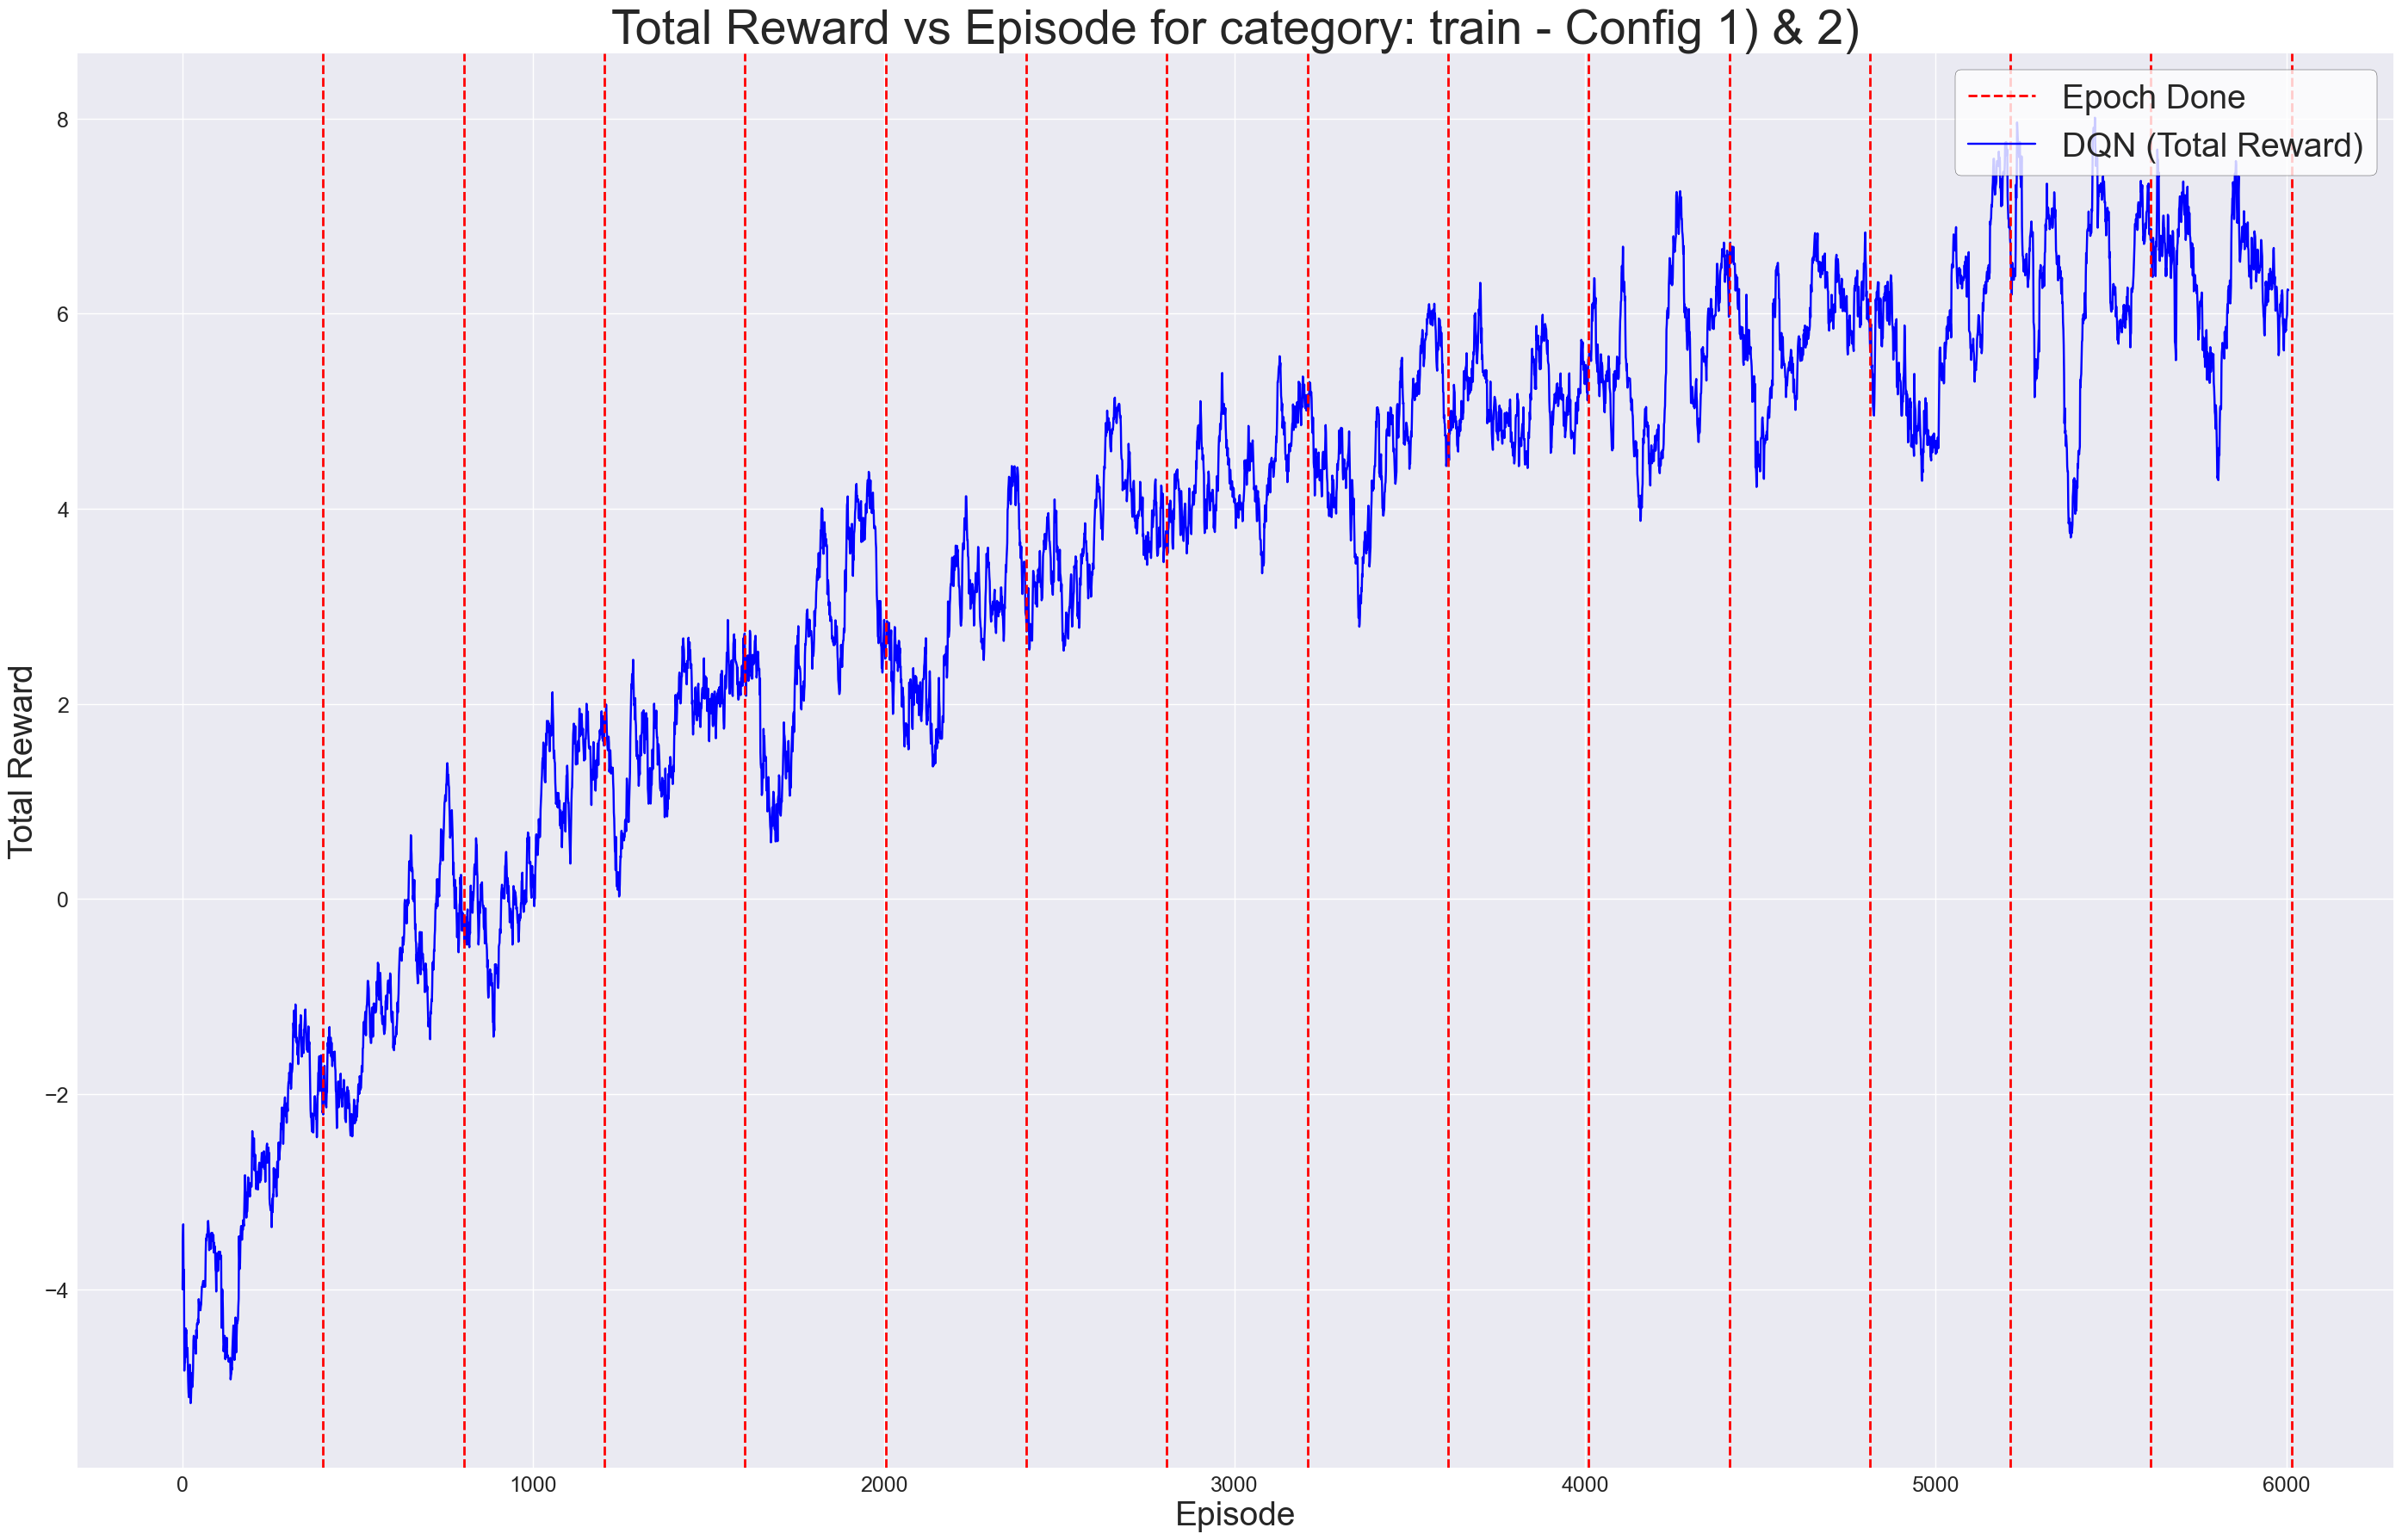

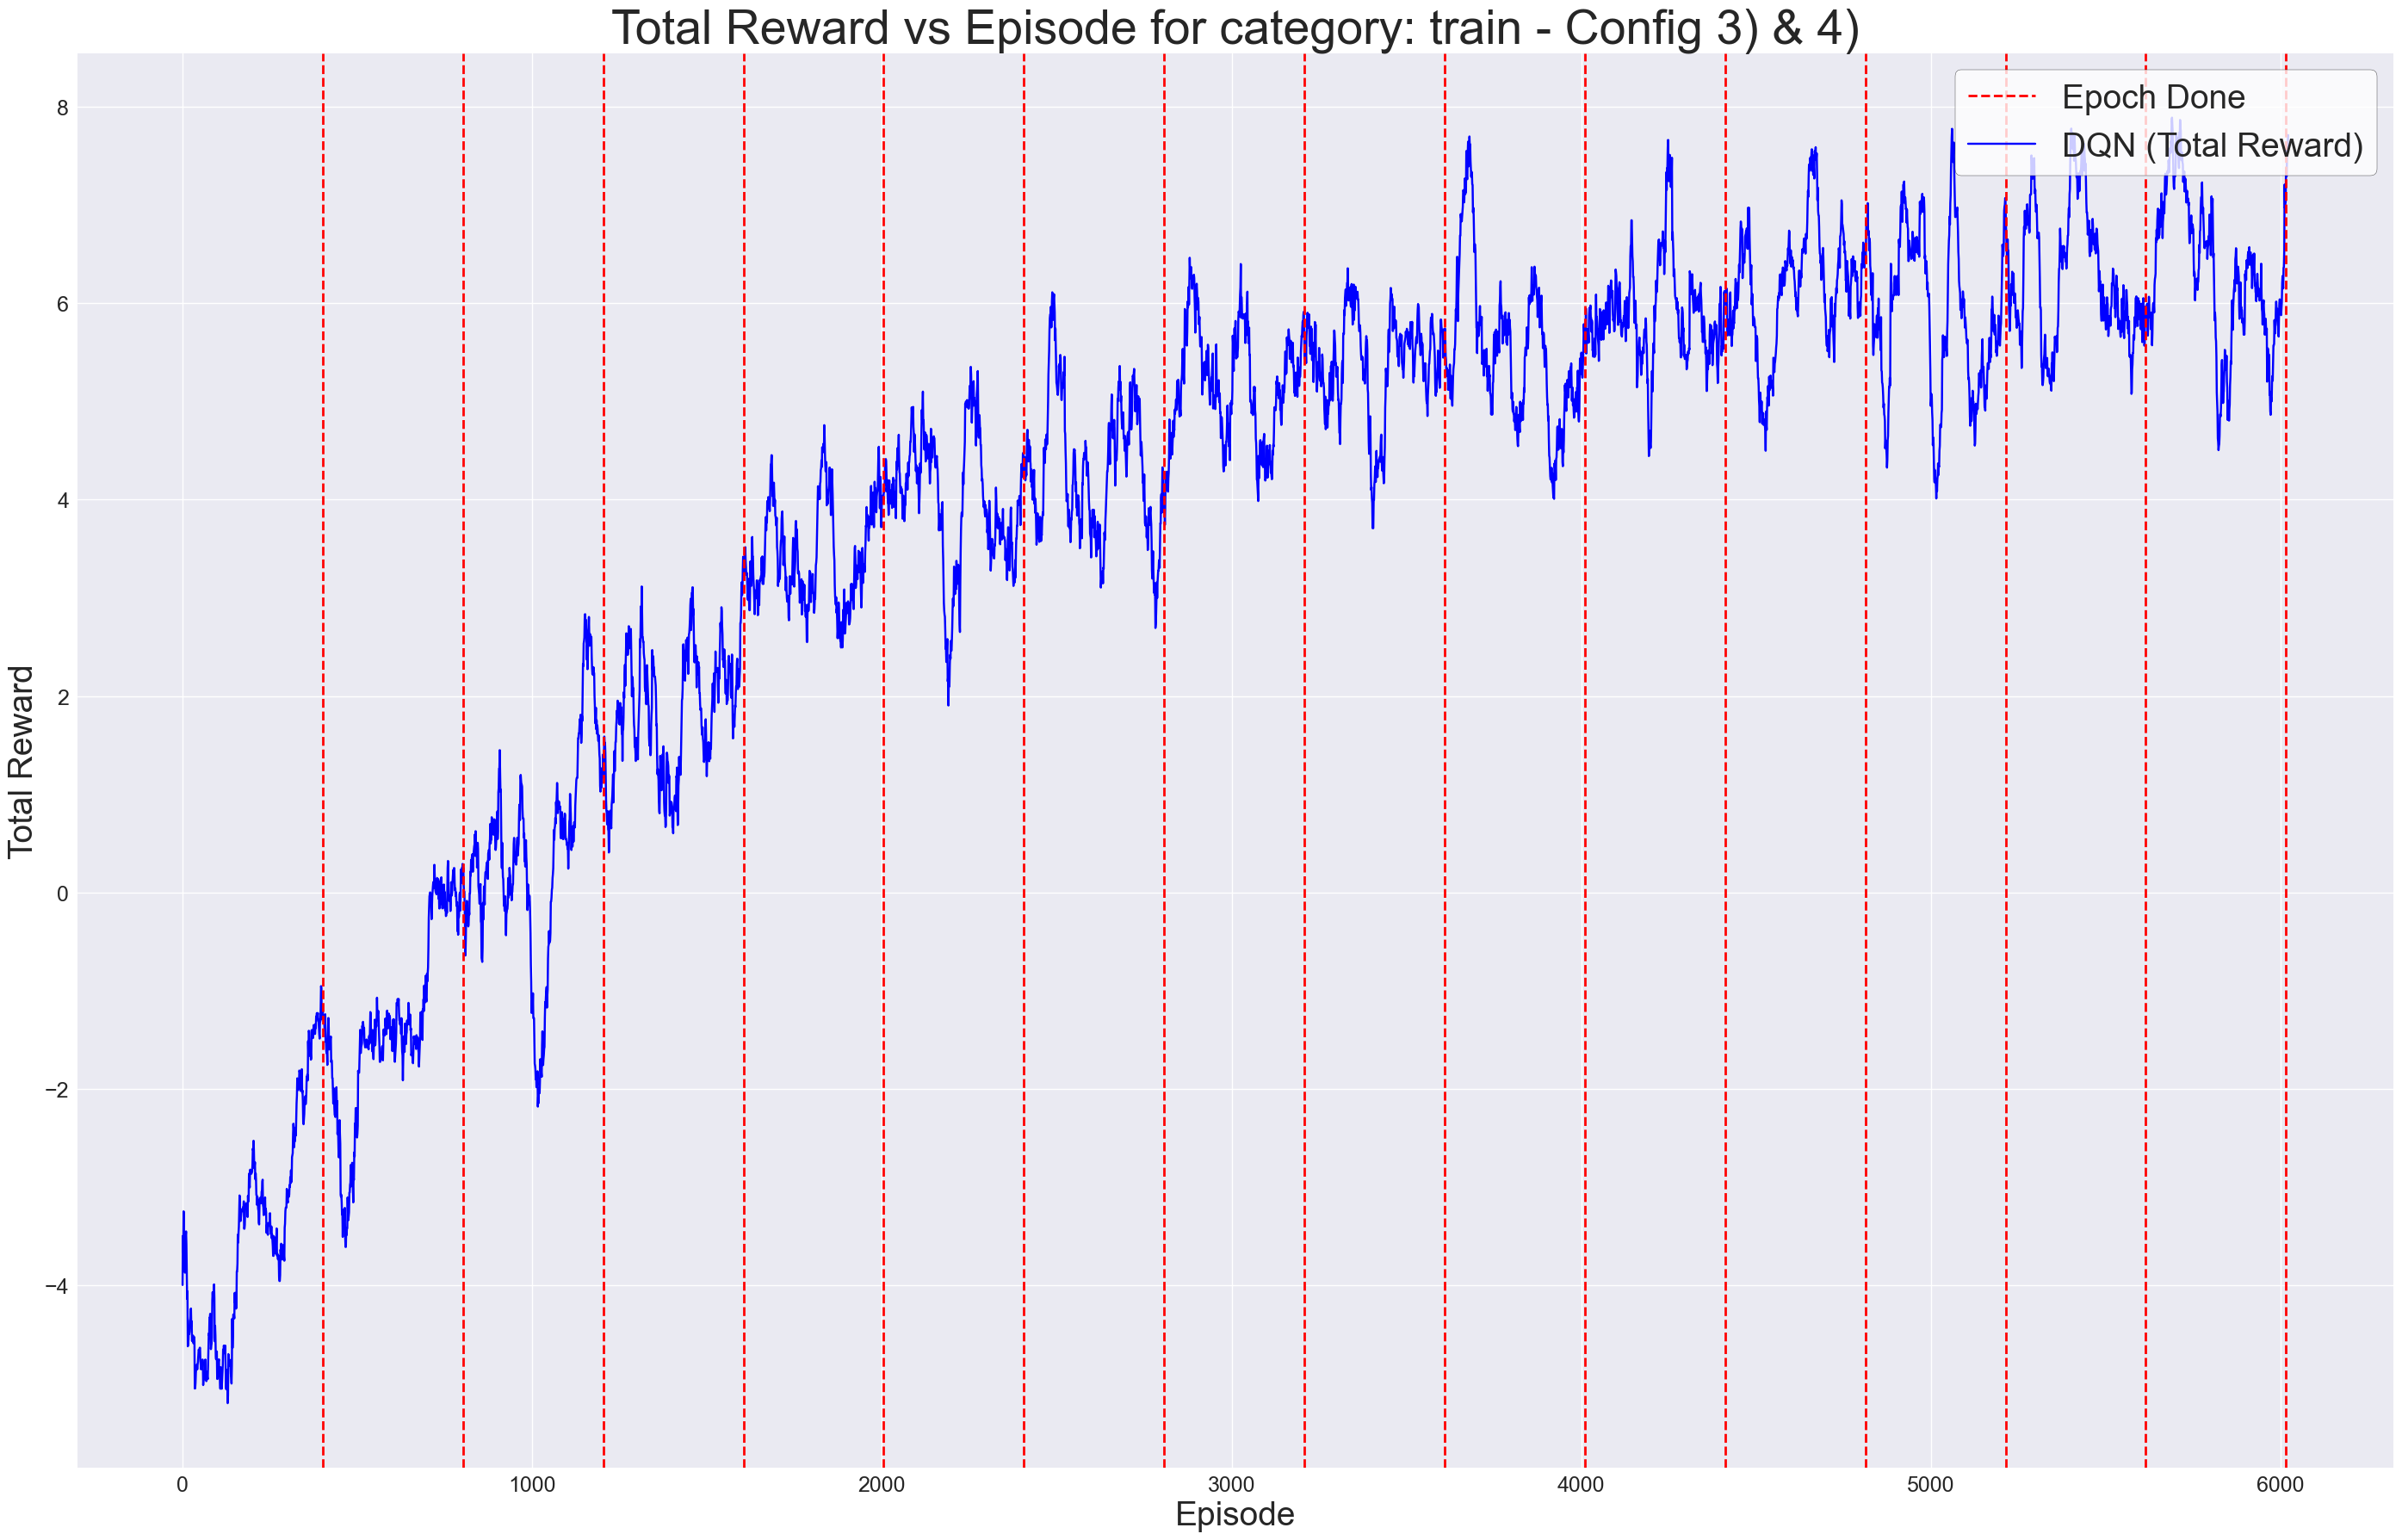

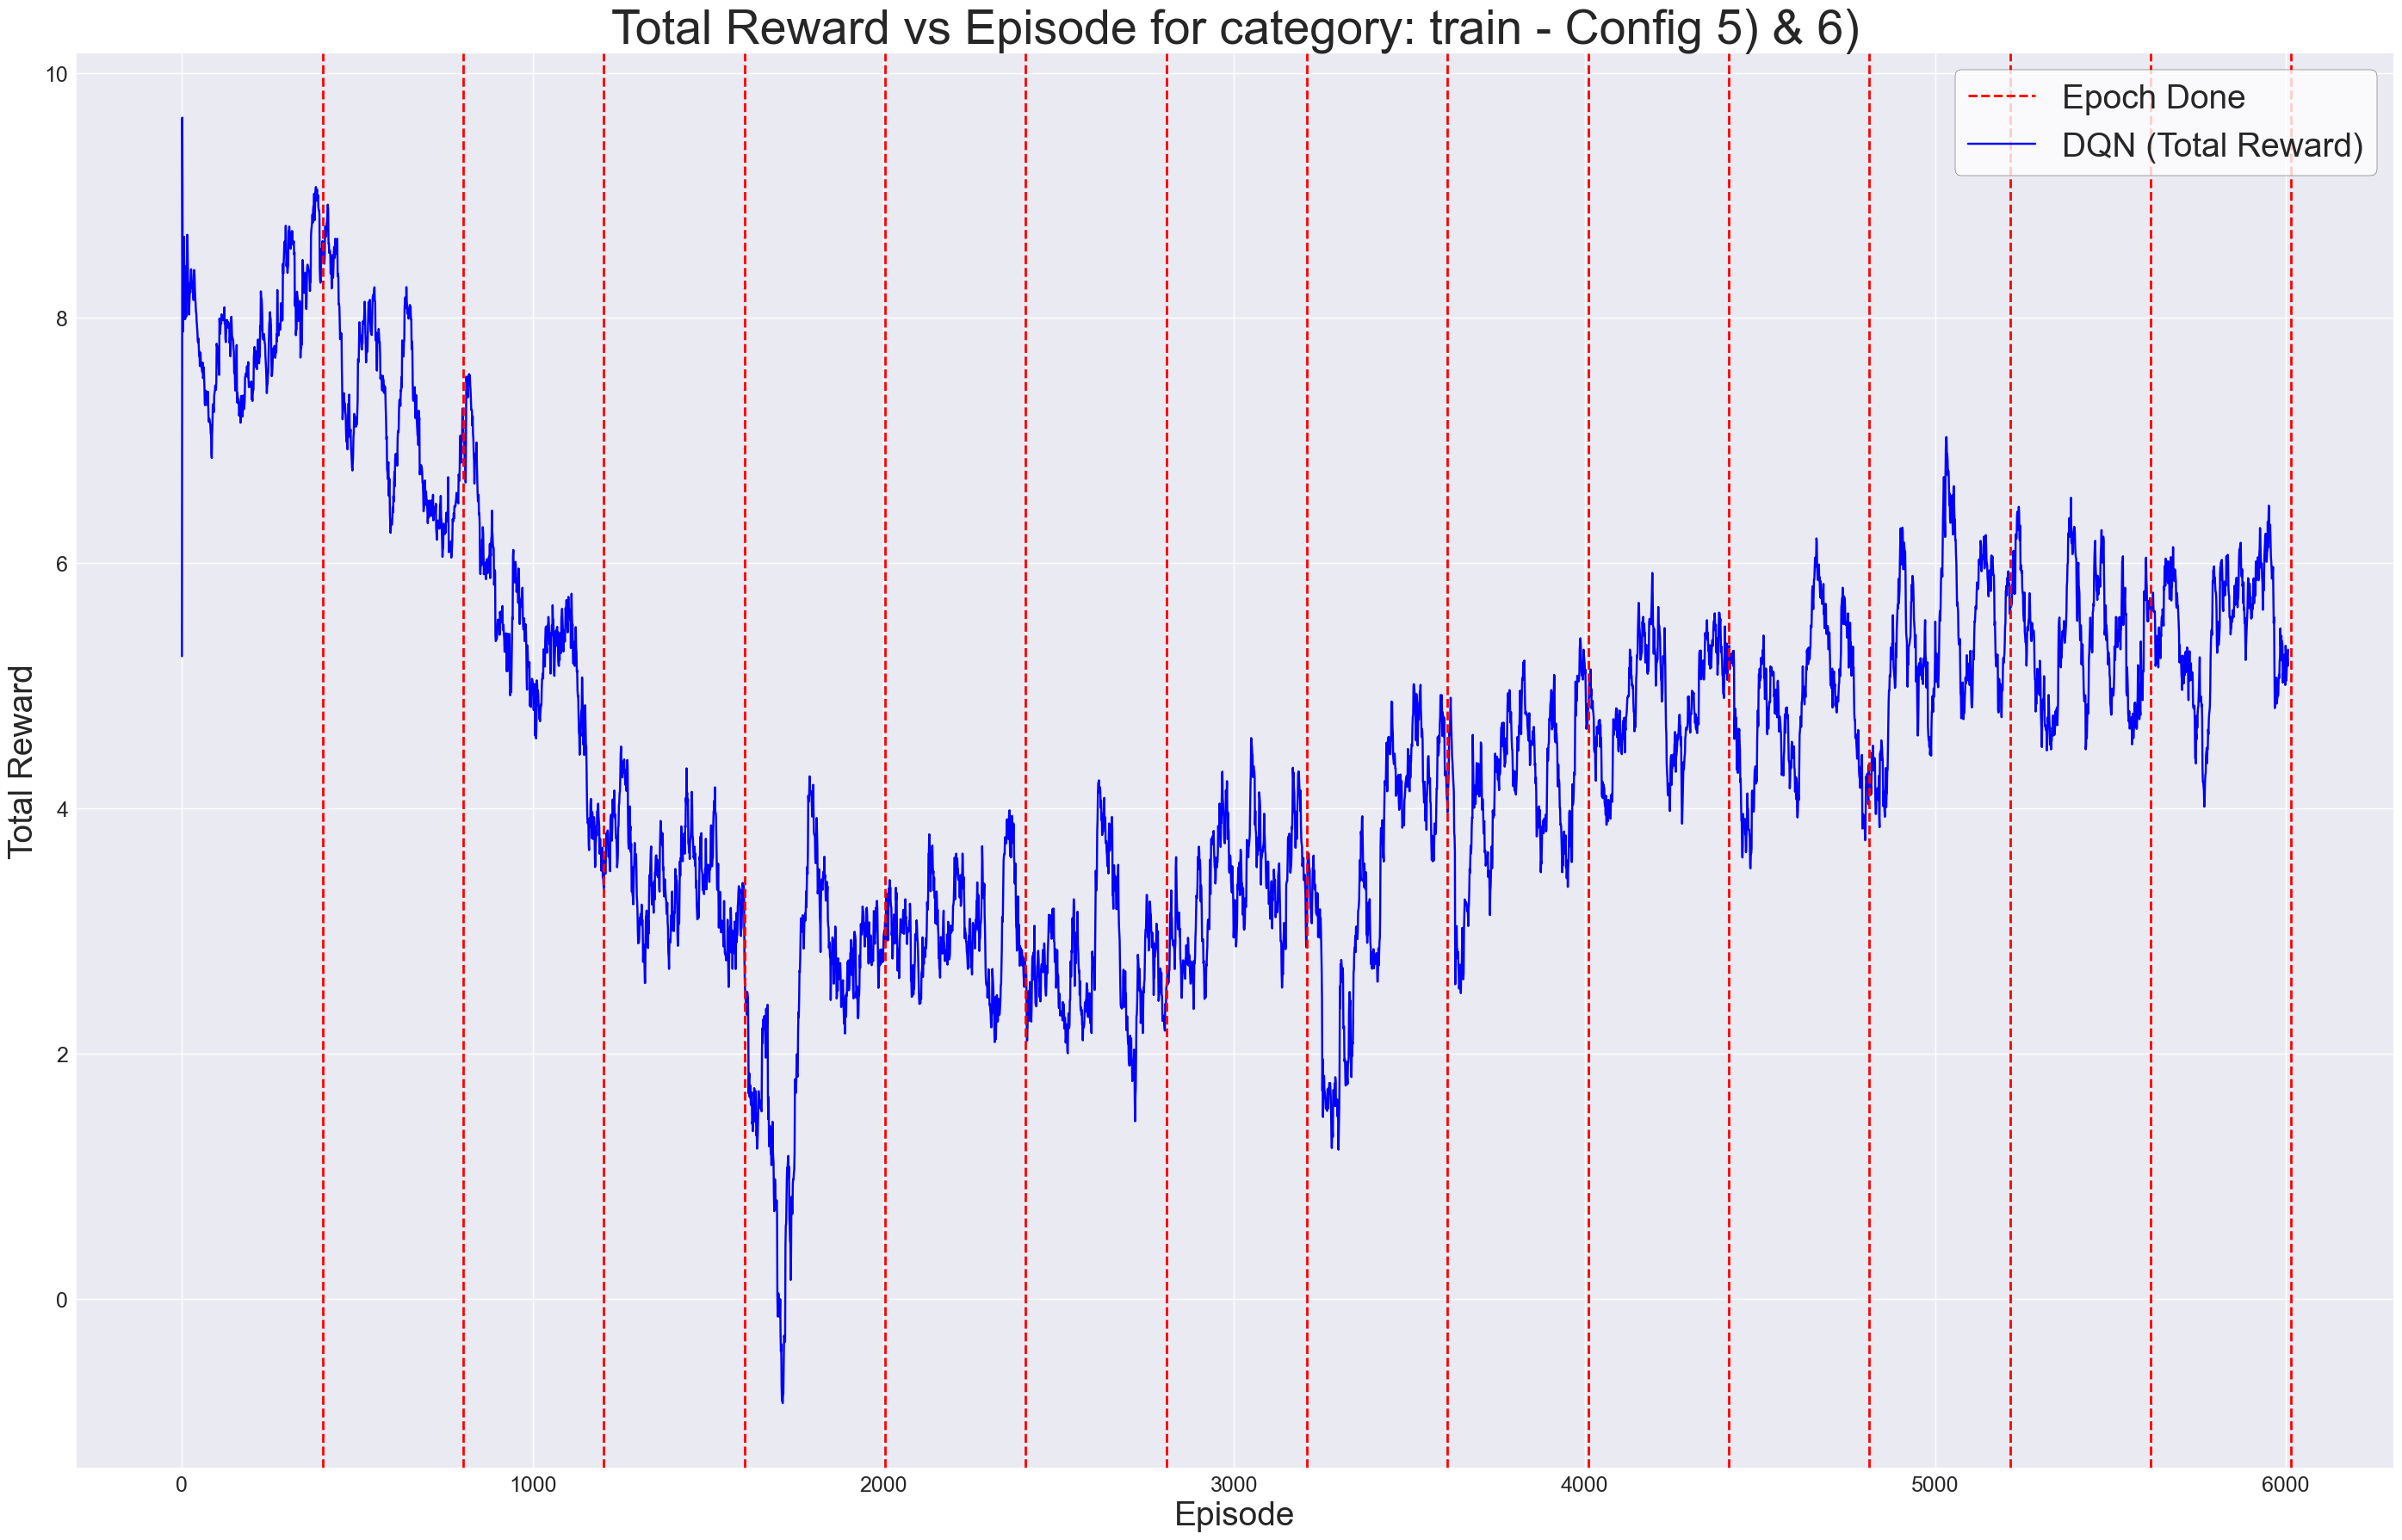

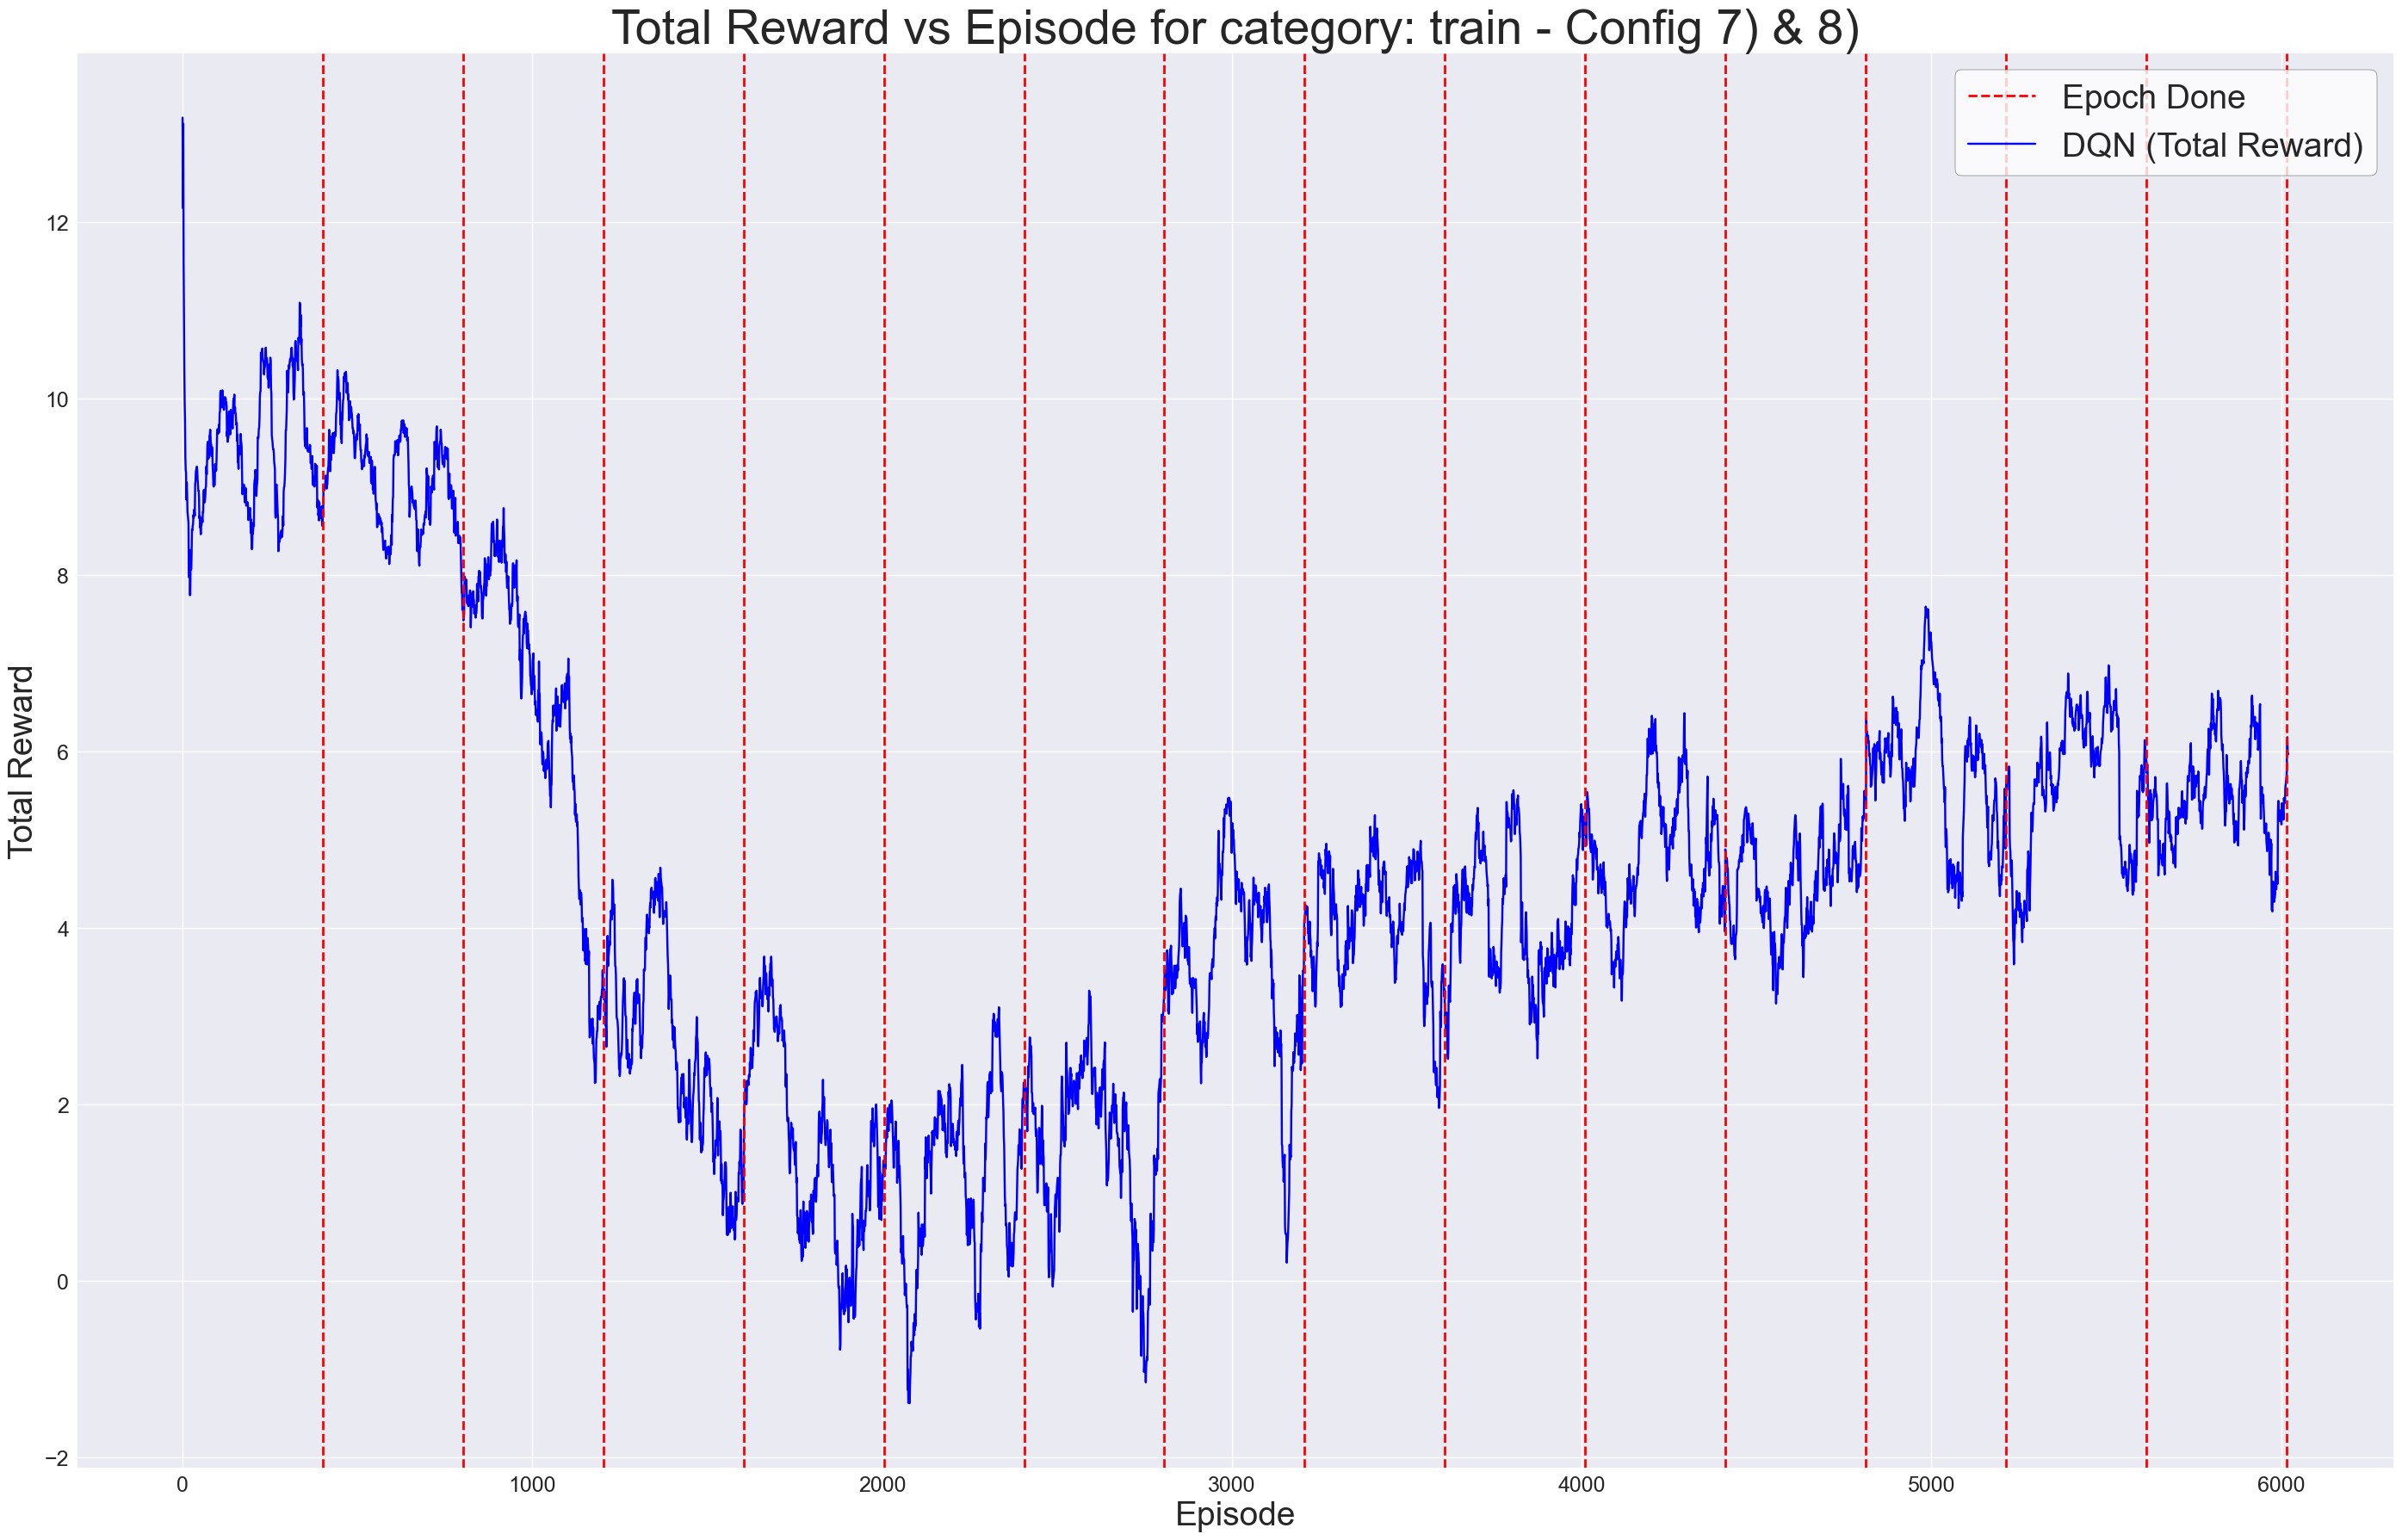

In [4]:
# Defining the configurations for the experiments
configs = {'Normal DQN - Random Explore - VGG16 - No SaRa': 'Config 1) & 2)',
           'Normal DQN - Random Explore - VGG16 - With SaRa': 'Config 3) & 4)',
           'Normal DQN - Guided Explore - VGG16 - No SaRa': 'Config 5) & 6)',
           'Normal DQN - Guided Explore - VGG16 - With SaRa': 'Config 7) & 8)',
           }

# Selecting the current class
current_class = 'train'

# Defining the category number of images
category_num_imgs = 401

# Iterating through the configurations
for config_name in configs.keys():
    # Loading from Numpy
    dqn_episode_info = np.load('evaluation_models/' + config_name + '/' + current_class + '/episode_info.npy', allow_pickle=True).item()
    rewards_list = dqn_episode_info["episode_avg_rewards"]

    # Plotting the rewards
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(28,18))
    sns.lineplot(data=rewards_list, ax=ax, color='blue')
    # Plotting a vertical dotted red line for 15 times to denote the number of epochs
    for i in range(1, 16):
        ax.axvline(x=i*category_num_imgs, color='red', linestyle='--', linewidth=2)
    ax.set_xlabel('Episode', fontsize=28)
    ax.set_ylabel('Total Reward', fontsize=28)
    ax.set_title('Total Reward vs Episode for category: ' + current_class + ' - ' + configs[config_name], fontsize=40)
    ax.tick_params(axis='both', labelsize=18)
    ax.grid(True)
    blue_line = mlines.Line2D([], [], color='blue', label='DQN (Total Reward)')
    red_line = mlines.Line2D([], [], color='red', linestyle='--', linewidth=2, label='Epoch Done')
    ax.legend(handles=[red_line, blue_line], loc='upper right', fontsize=28, frameon=True, facecolor='white', edgecolor='black')
    plt.tight_layout()
    # Saving the figure
    # Creating the directory if it does not exist
    os.makedirs(save_path + '/Experiment1/', exist_ok=True)
    plt.savefig(save_path + '/Experiment1/' + current_class + '_' + config_name + '_rewards.png')
    plt.show()

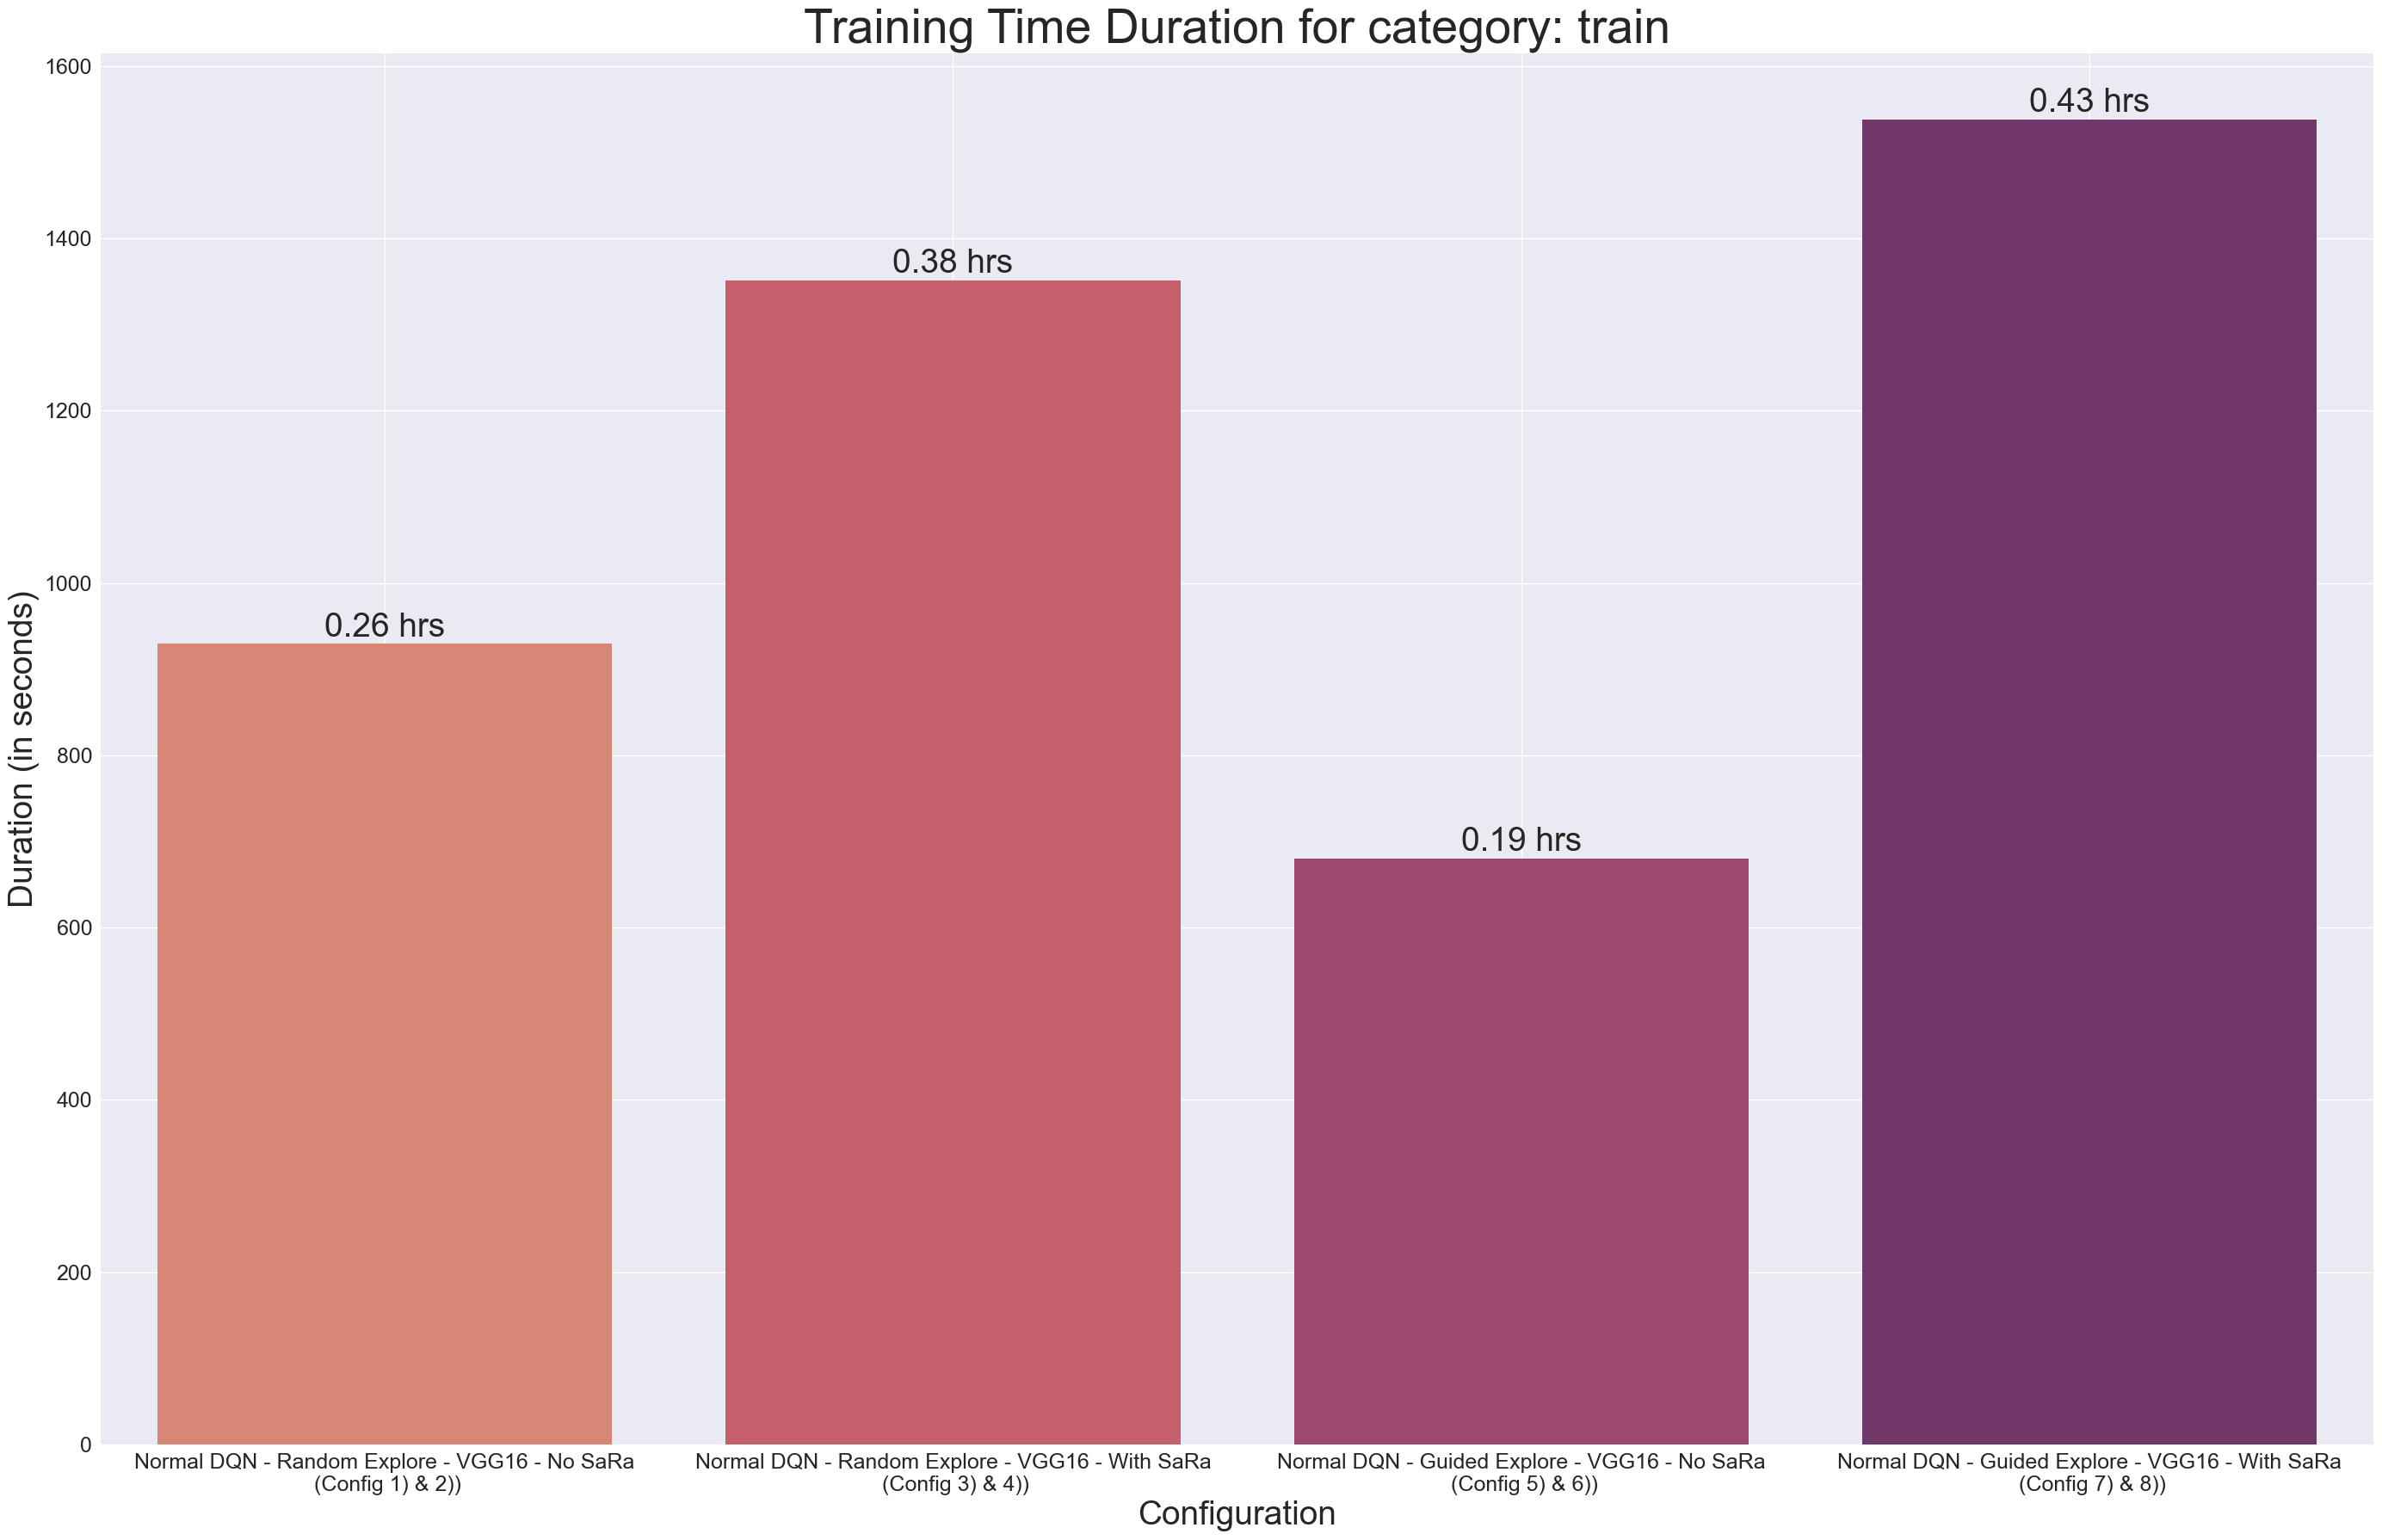

In [6]:
# Creating dictionary to store the training time duration
duration_dict = {}

# Iterating through the configurations
for config_name in configs.keys():
    # Loading from Numpy
    dqn_episode_info = np.load('evaluation_models/' + config_name + '/' + current_class + '/episode_info.npy', allow_pickle=True).item()
    duration_dict[config_name] = dqn_episode_info["eps_duration"]

# Plotting a bar graph for the training time duration
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(28,18))
# Appending the duration dictionary keys to the configuration names
labels = [config_name + '\n (' + configs[config_name]+')' for config_name in duration_dict.keys()]
sns.barplot(x=labels, y=list(duration_dict.values()), ax=ax, palette='flare')
# Drawing duration in hours on top of the bars
for i, v in enumerate(list(duration_dict.values())):
    ax.text(i, v + 0.5, str(round(v/3600, 2)) + ' hrs', ha='center', va='bottom', fontsize=28)
ax.set_xlabel('Configuration', fontsize=28)
ax.set_ylabel('Duration (in seconds)', fontsize=28)
ax.set_title('Training Time Duration for category: ' + current_class, fontsize=40)
ax.tick_params(axis='both', labelsize=18)
ax.grid(True)
plt.tight_layout()
# Saving the figure
# Creating the directory if it does not exist
os.makedirs(save_path + '/Experiment1/', exist_ok=True)
plt.savefig(save_path + '/Experiment1/' + current_class + '_training_time.png')
plt.show()

**<h3> Plotting Results for Experiment 2: Feature Learning Architectures </h3>**

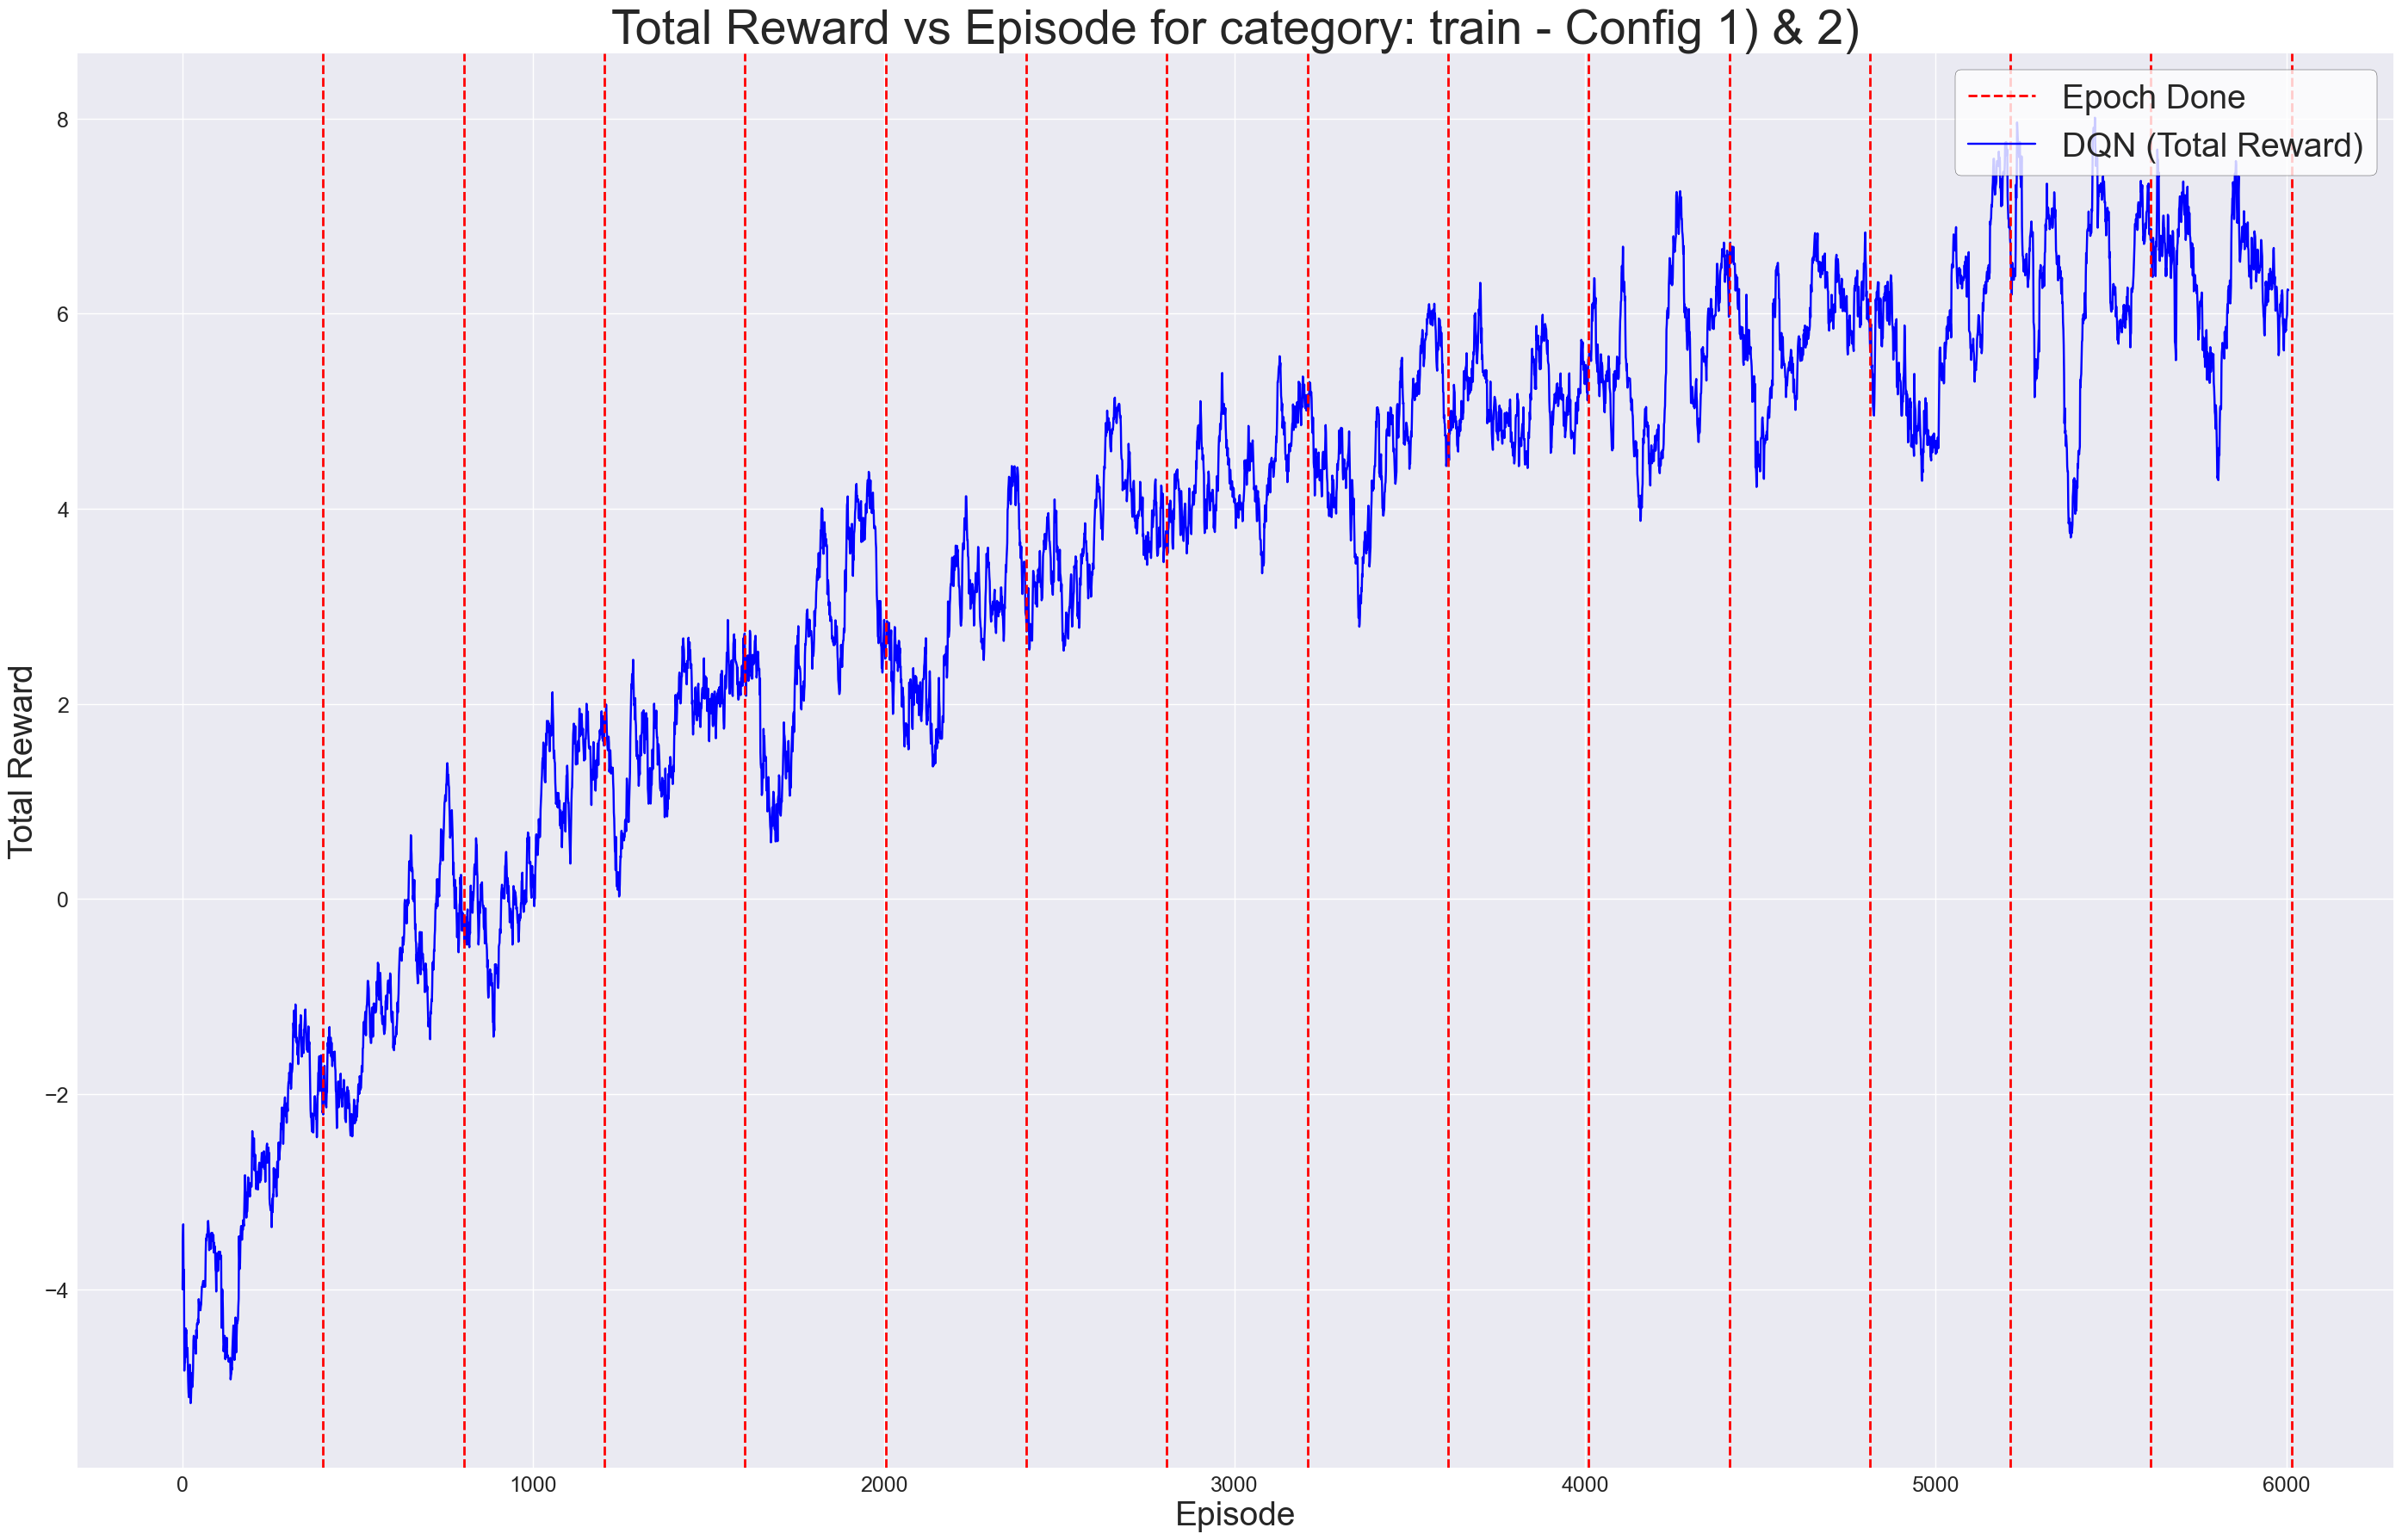

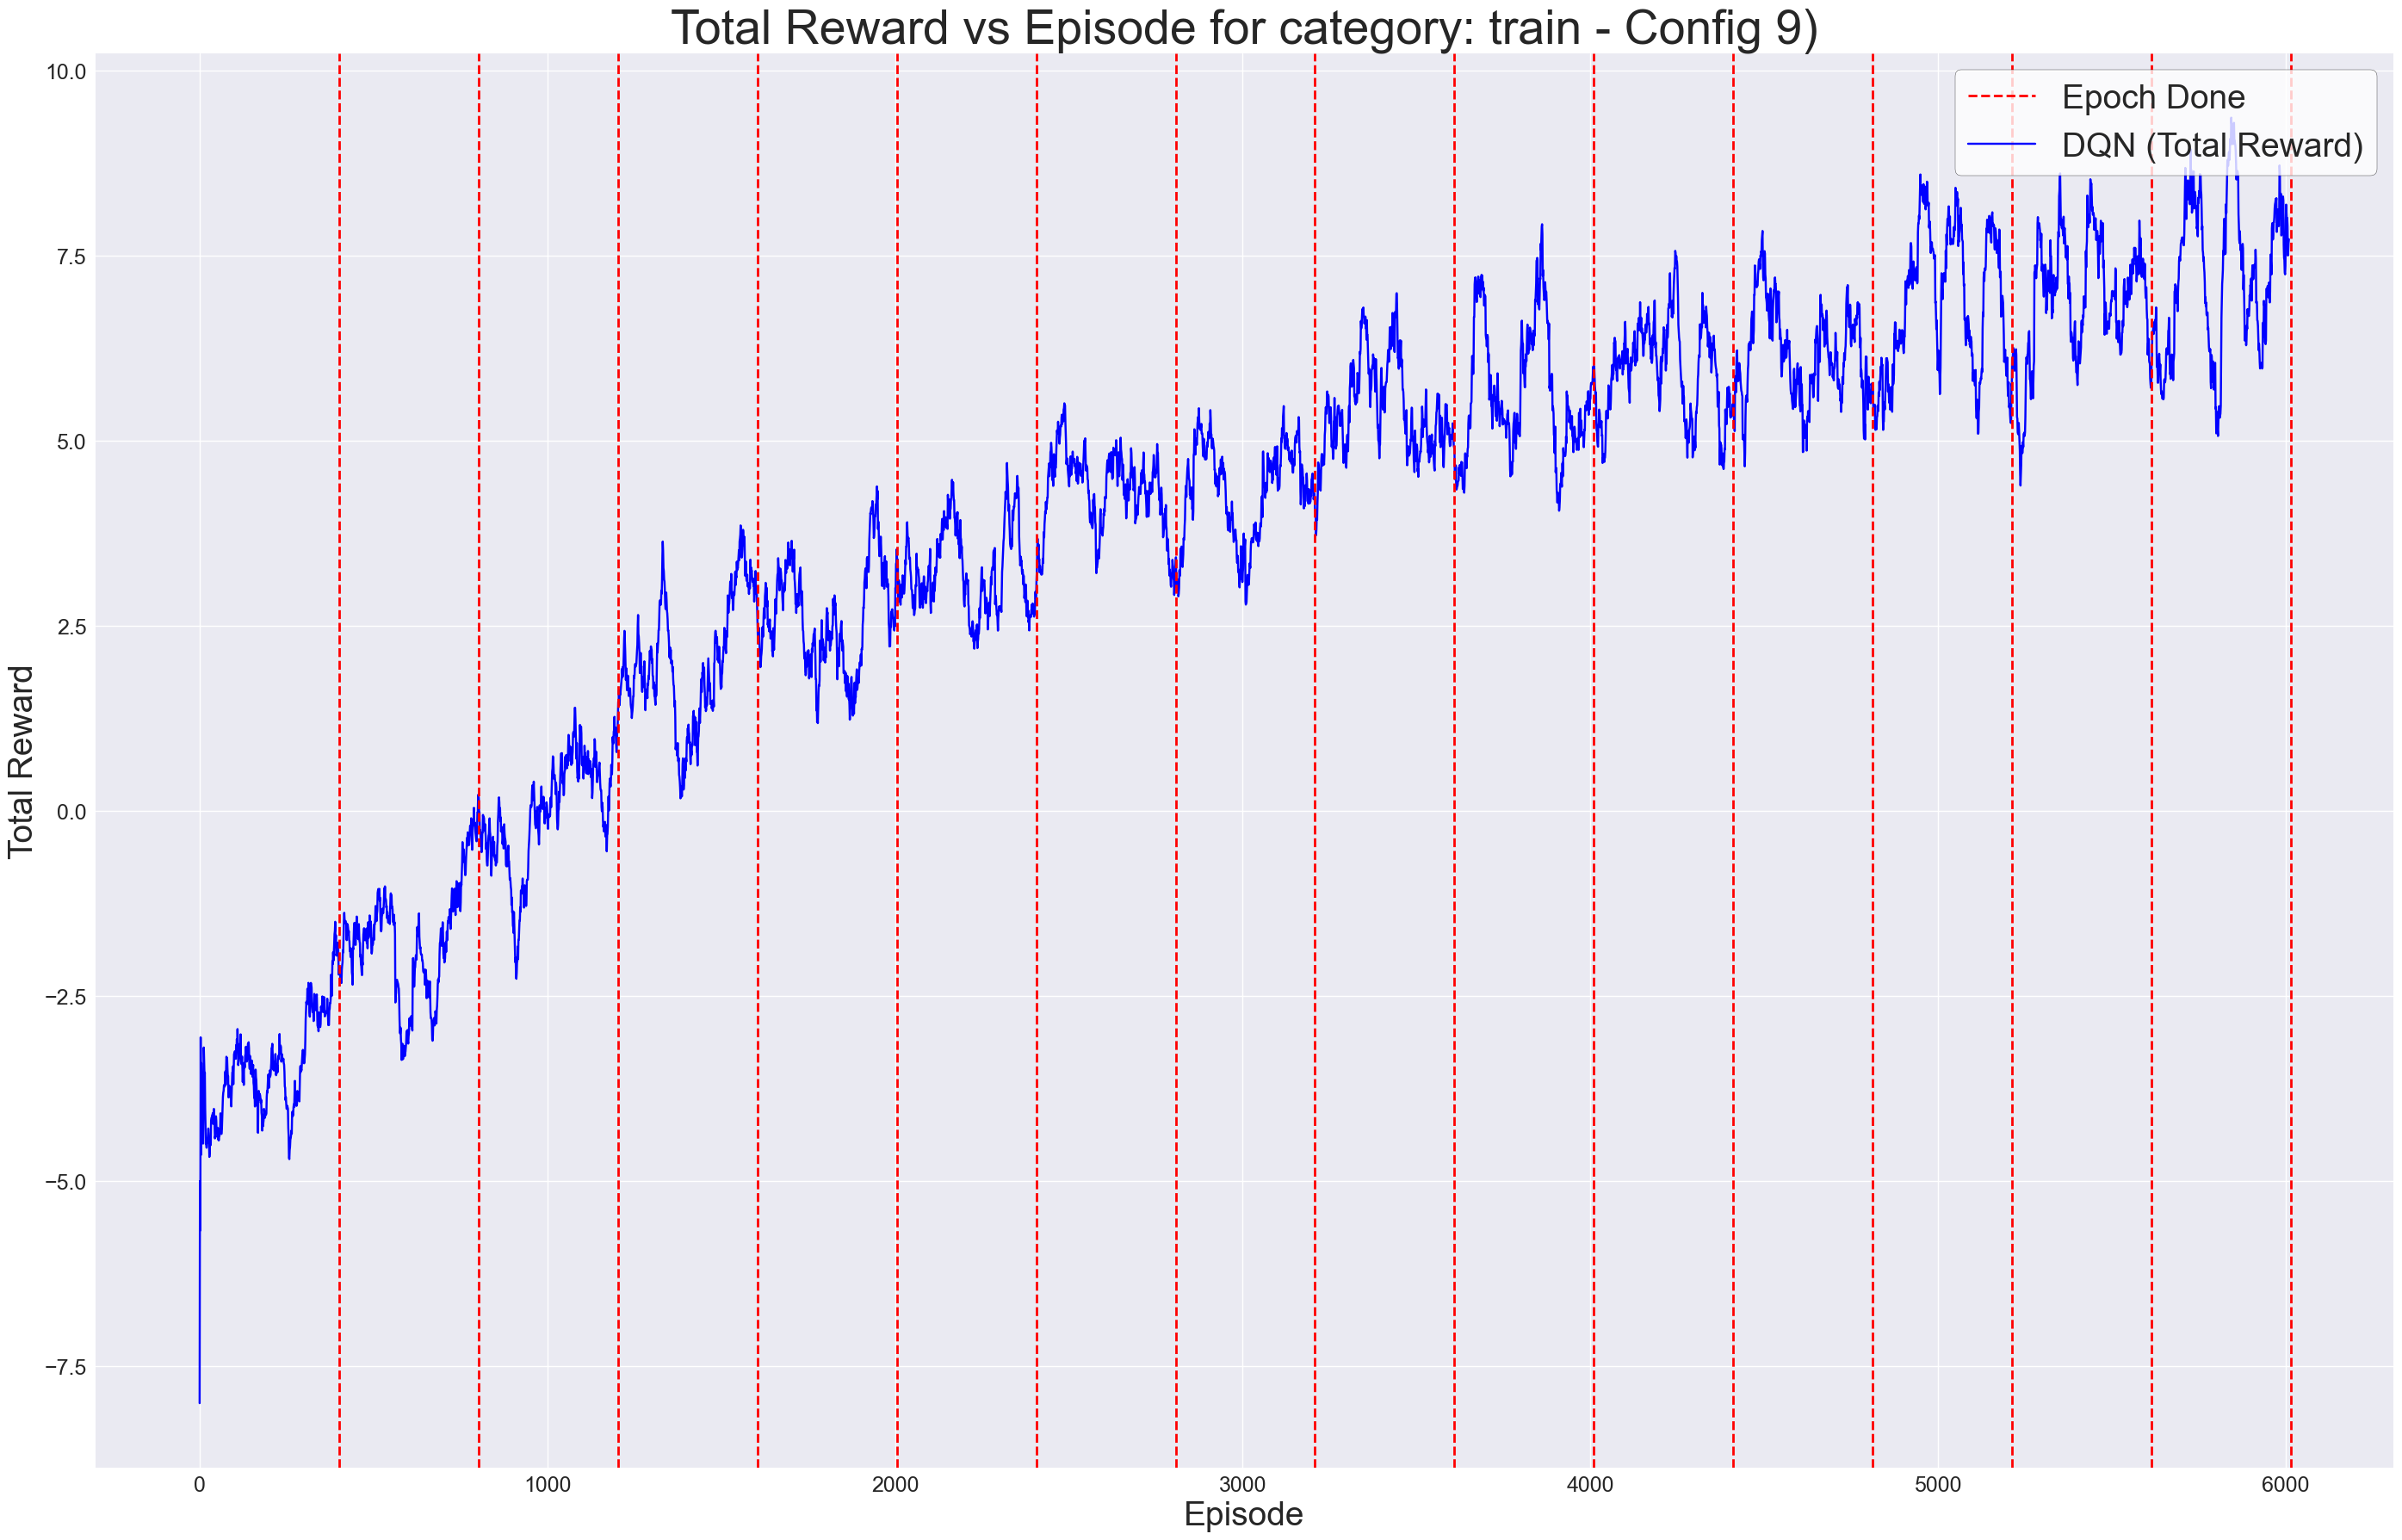

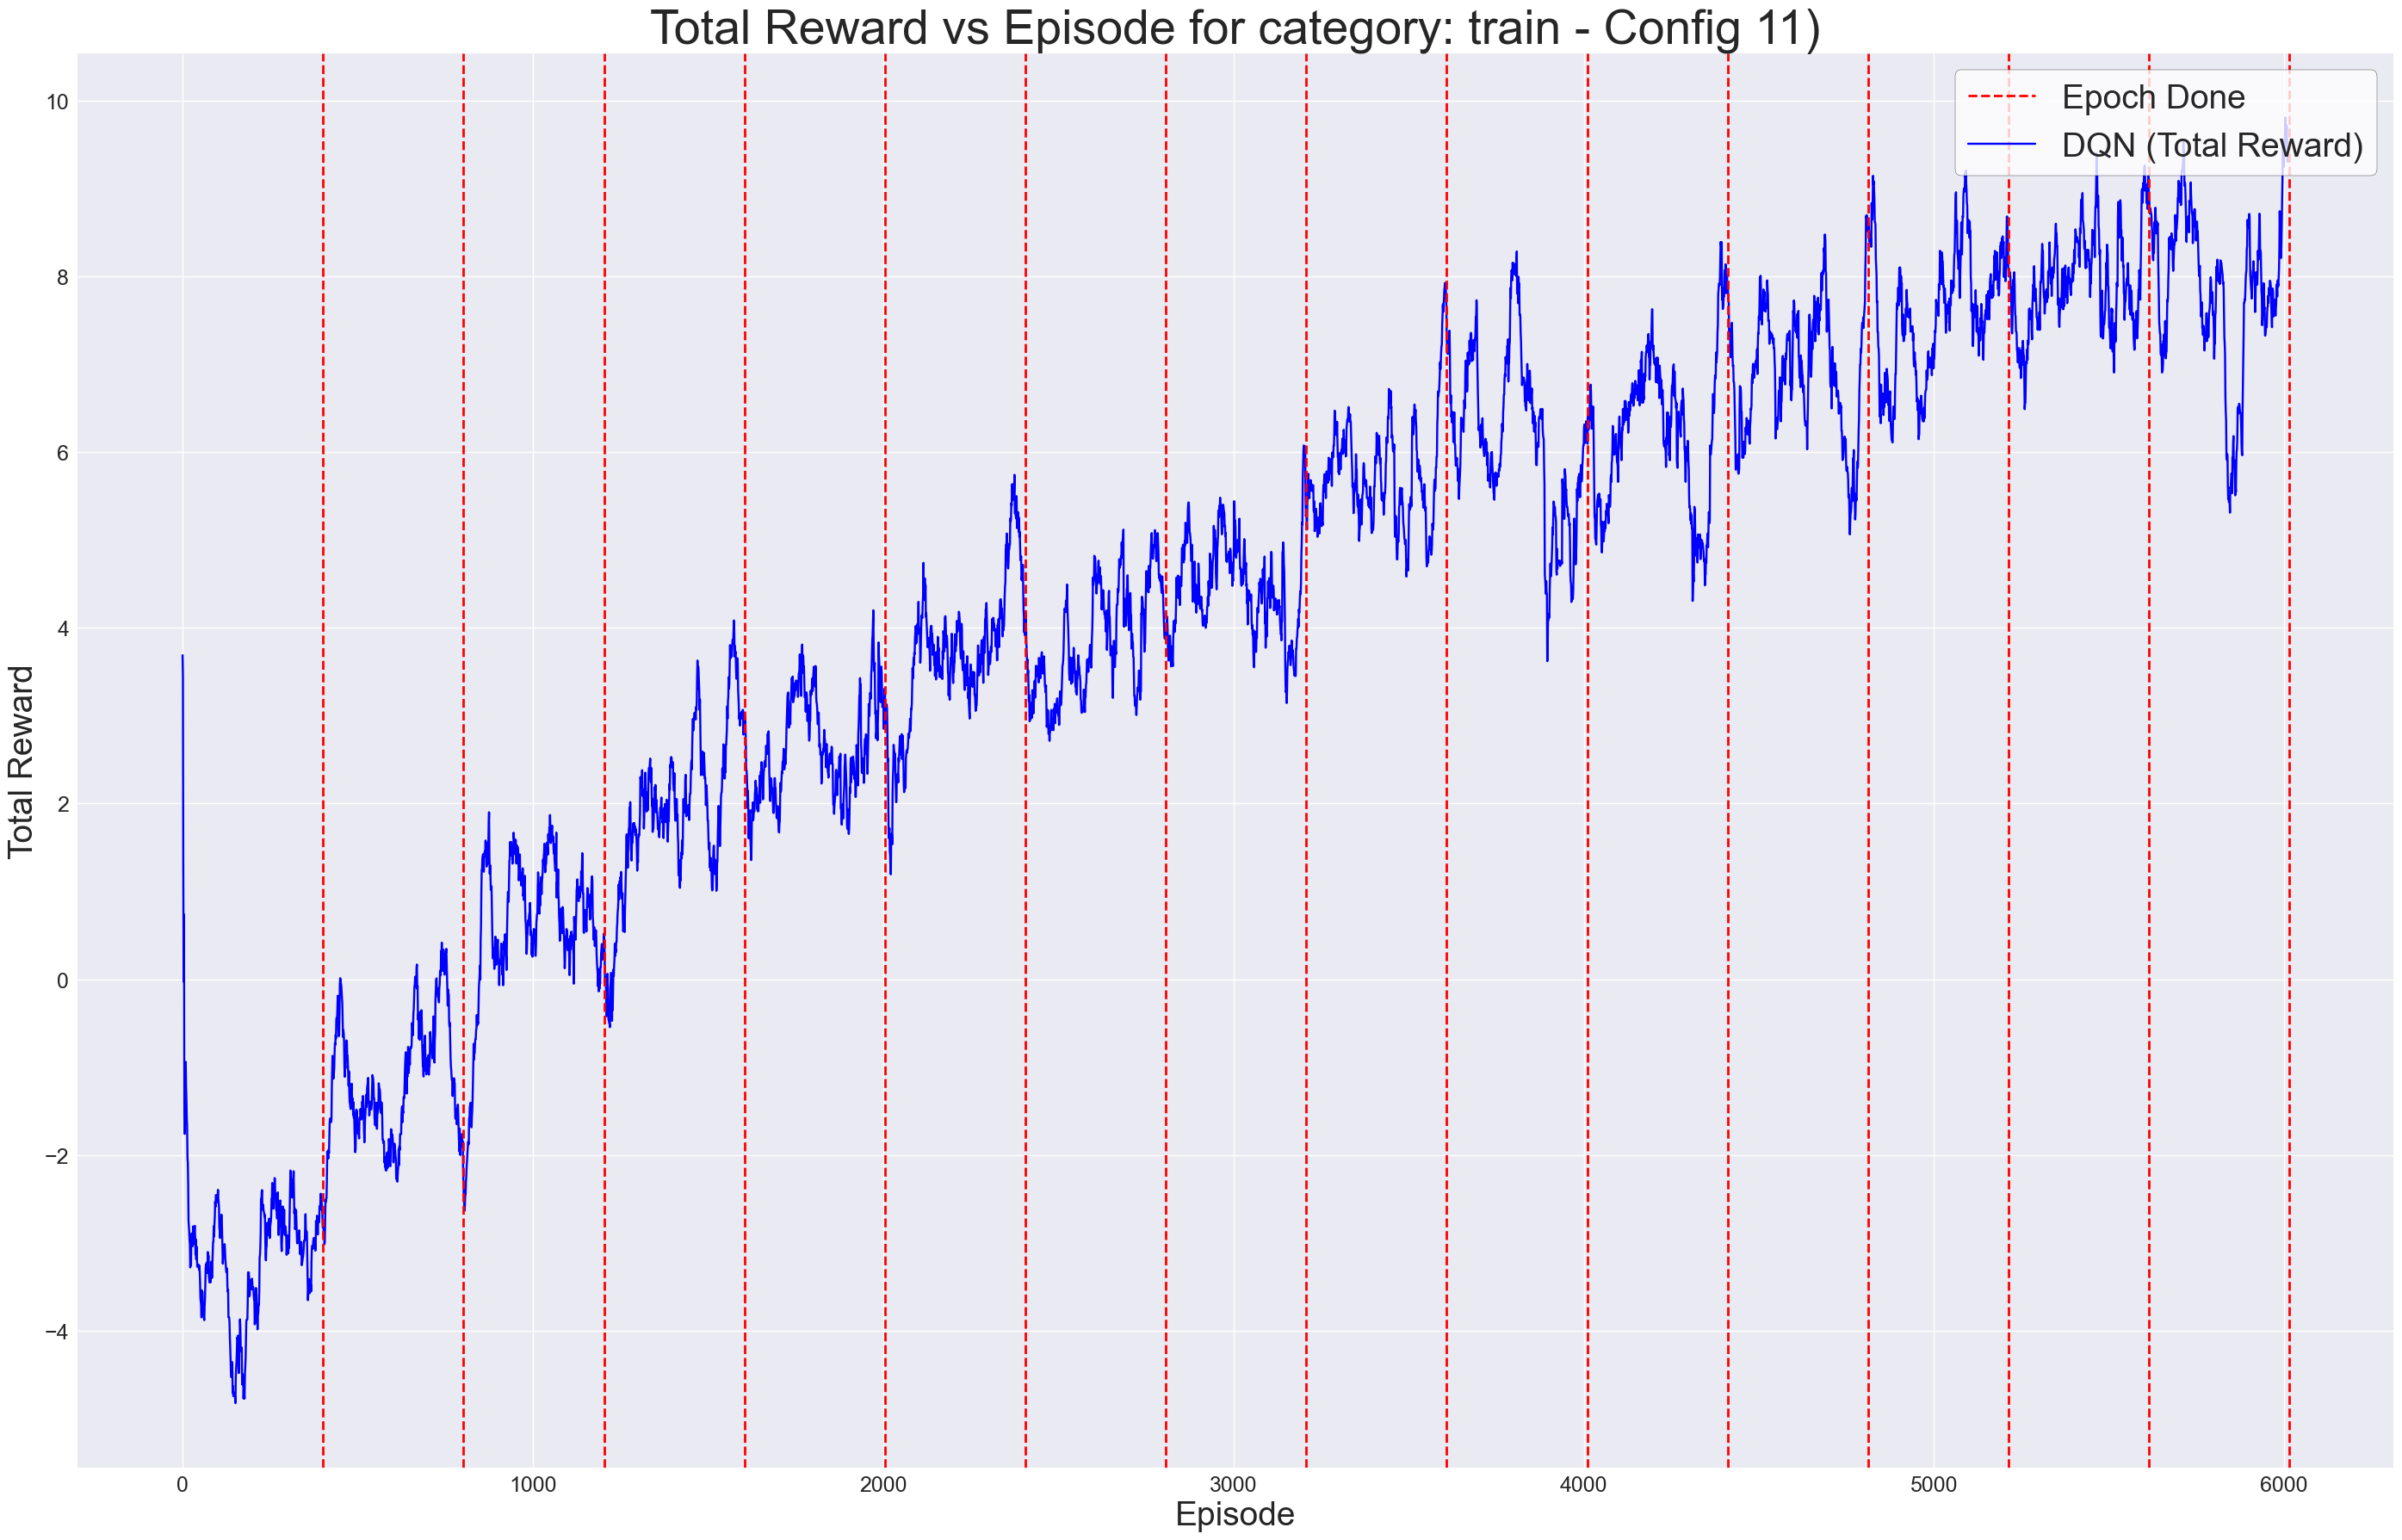

In [7]:
# Defining the configurations for the experiments
configs = {'Normal DQN - Random Explore - VGG16 - No SaRa': 'Config 1) & 2)',
           'Normal DQN - Random Explore - MobileNet - No SaRa': 'Config 9)',
           'Normal DQN - Random Explore - ResNet50 - No SaRa': 'Config 11)',
           }

# Selecting the current class
current_class = 'train'

# Defining the category number of images
category_num_imgs = 401

# Iterating through the configurations
for config_name in configs.keys():
    # Loading from Numpy
    dqn_episode_info = np.load('evaluation_models/' + config_name + '/' + current_class + '/episode_info.npy', allow_pickle=True).item()
    rewards_list = dqn_episode_info["episode_avg_rewards"]

    # Plotting the rewards
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(28,18))
    sns.lineplot(data=rewards_list, ax=ax, color='blue')
    # Plotting a vertical dotted red line for 15 times to denote the number of epochs
    for i in range(1, 16):
        ax.axvline(x=i*category_num_imgs, color='red', linestyle='--', linewidth=2)
    ax.set_xlabel('Episode', fontsize=28)
    ax.set_ylabel('Total Reward', fontsize=28)
    ax.set_title('Total Reward vs Episode for category: ' + current_class + ' - ' + configs[config_name], fontsize=40)
    ax.tick_params(axis='both', labelsize=18)
    ax.grid(True)
    blue_line = mlines.Line2D([], [], color='blue', label='DQN (Total Reward)')
    red_line = mlines.Line2D([], [], color='red', linestyle='--', linewidth=2, label='Epoch Done')
    ax.legend(handles=[red_line, blue_line], loc='upper right', fontsize=28, frameon=True, facecolor='white', edgecolor='black')
    plt.tight_layout()
    # Saving the figure
    # Creating the directory if it does not exist
    os.makedirs(save_path + '/Experiment2/', exist_ok=True)
    plt.savefig(save_path + '/Experiment2/' + current_class + '_' + config_name + '_rewards.png')
    plt.show()

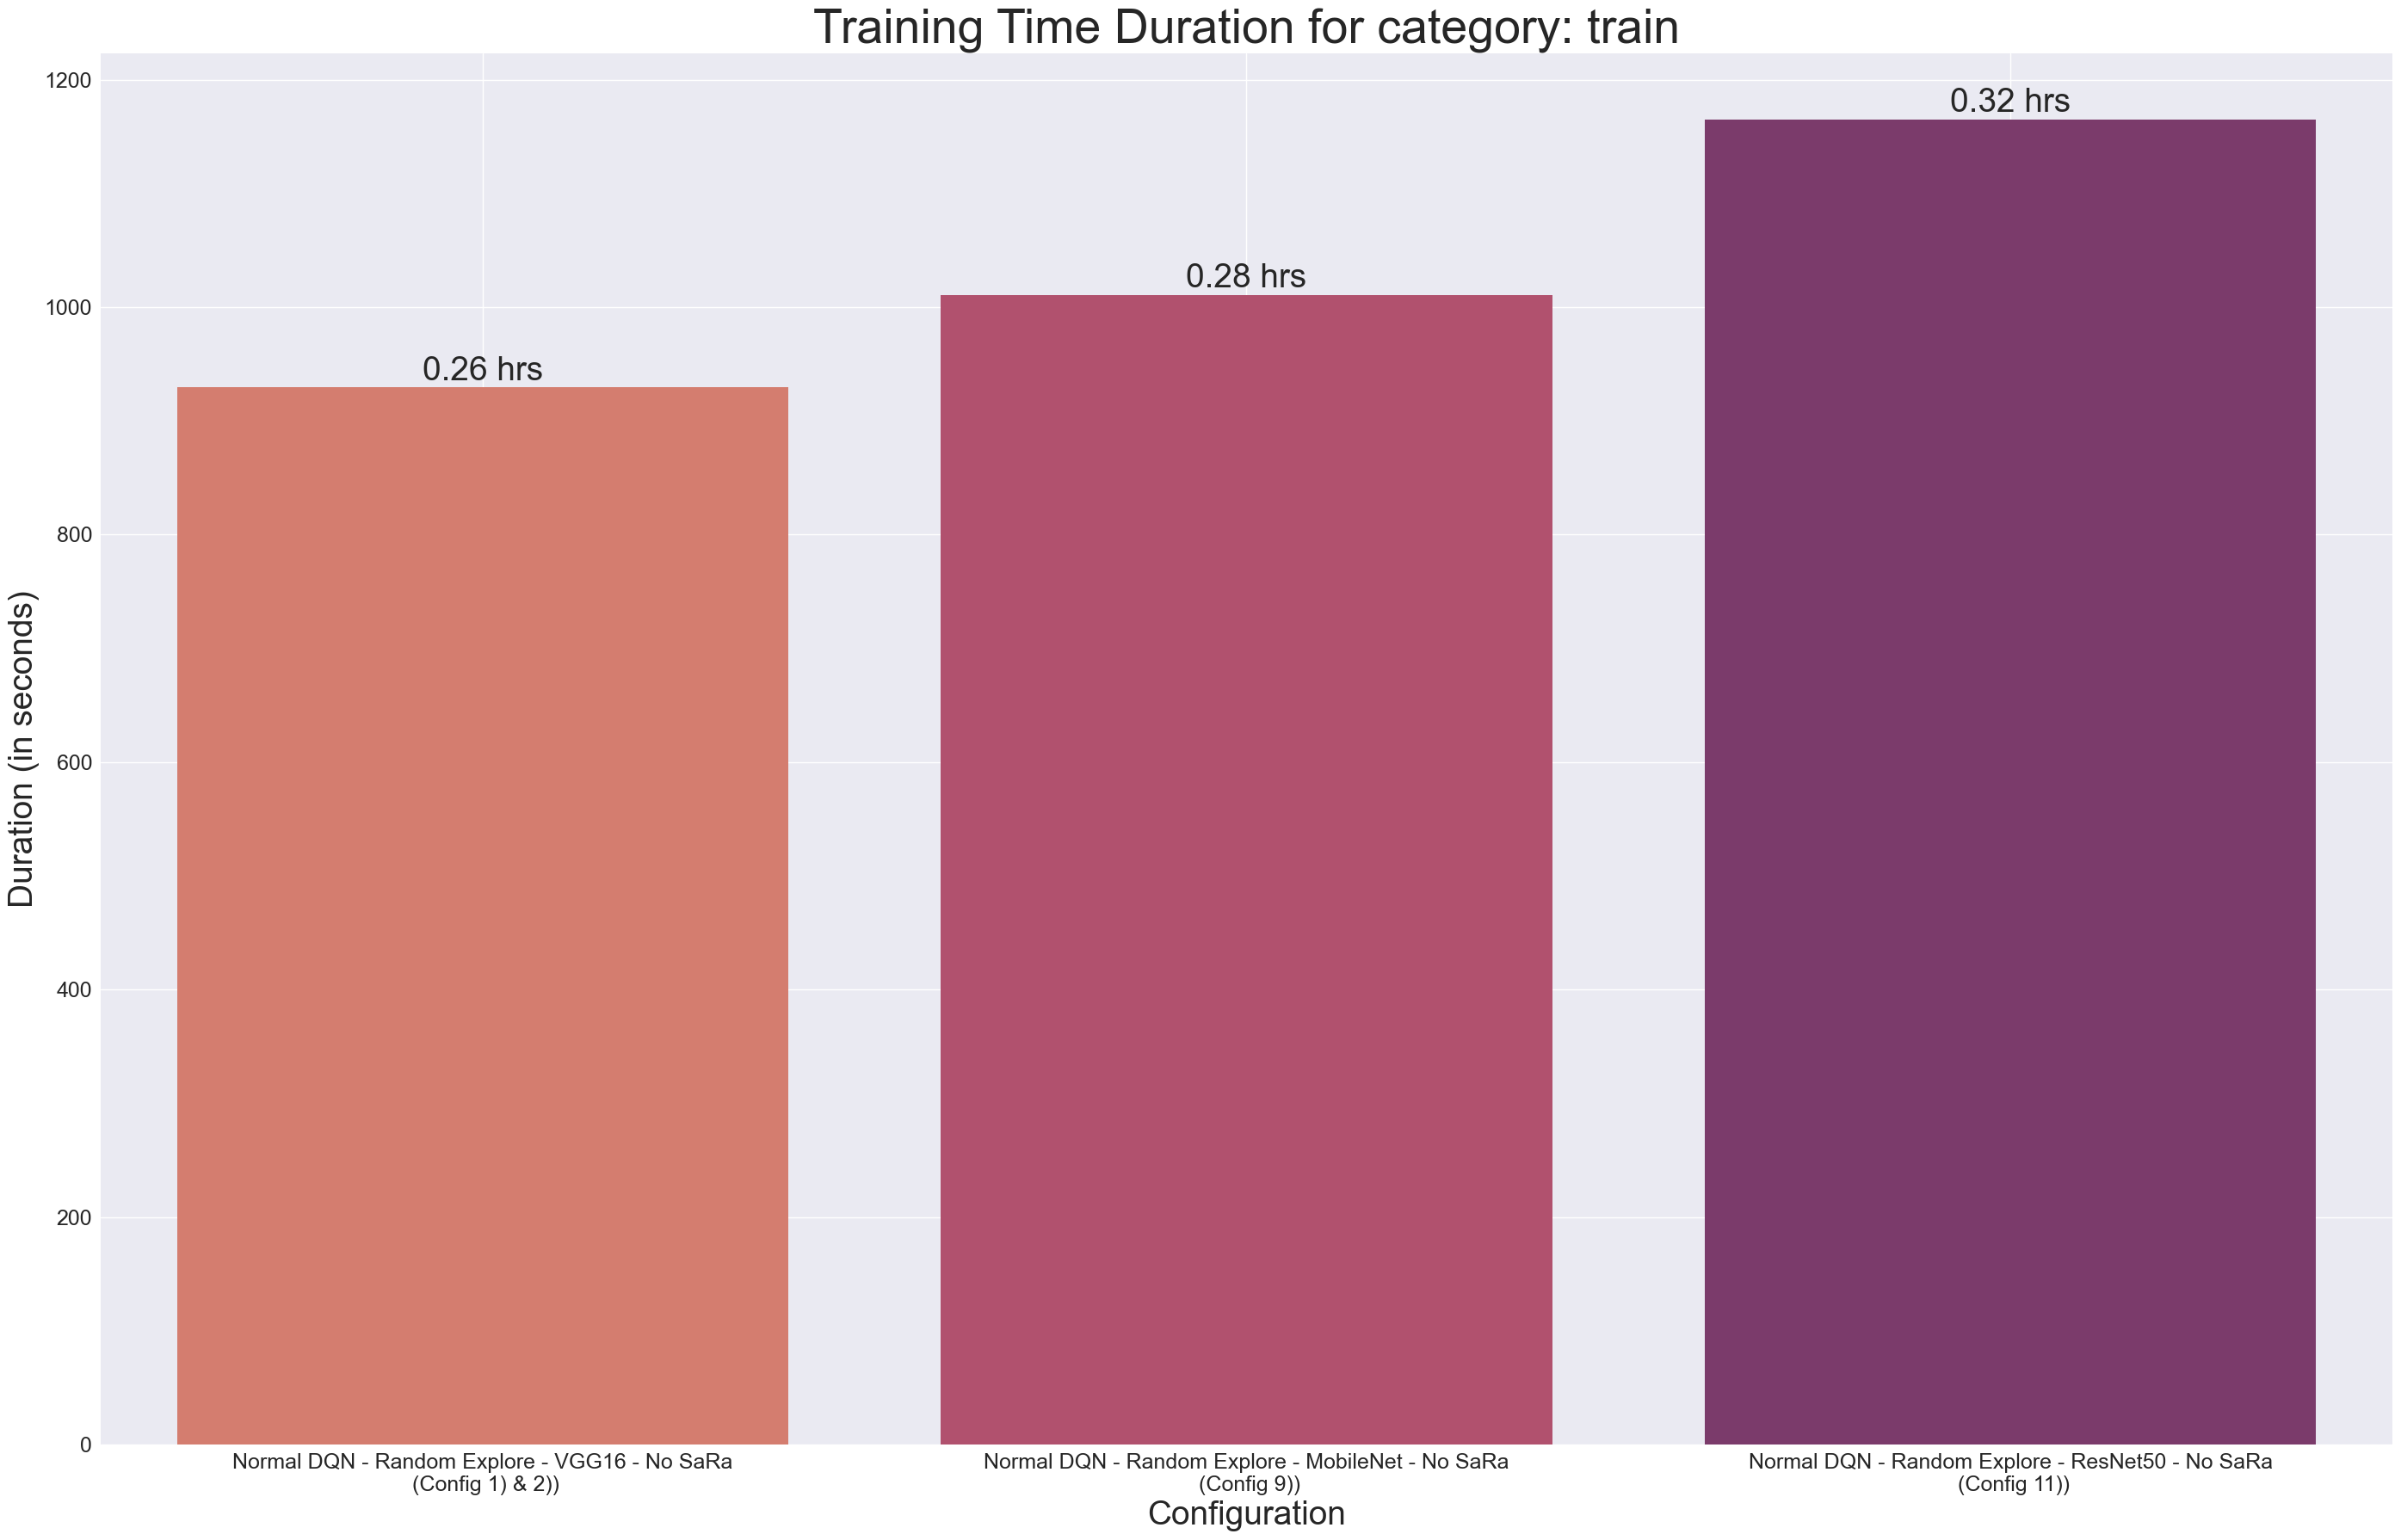

In [8]:
# Creating dictionary to store the training time duration
duration_dict = {}

# Iterating through the configurations
for config_name in configs.keys():
    # Loading from Numpy
    dqn_episode_info = np.load('evaluation_models/' + config_name + '/' + current_class + '/episode_info.npy', allow_pickle=True).item()
    duration_dict[config_name] = dqn_episode_info["eps_duration"]

# Plotting a bar graph for the training time duration
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(28,18))
# Appending the duration dictionary keys to the configuration names
labels = [config_name + '\n (' + configs[config_name]+')' for config_name in duration_dict.keys()]
sns.barplot(x=labels, y=list(duration_dict.values()), ax=ax, palette='flare')
# Drawing duration in hours on top of the bars
for i, v in enumerate(list(duration_dict.values())):
    ax.text(i, v + 0.5, str(round(v/3600, 2)) + ' hrs', ha='center', va='bottom', fontsize=28)
ax.set_xlabel('Configuration', fontsize=28)
ax.set_ylabel('Duration (in seconds)', fontsize=28)
ax.set_title('Training Time Duration for category: ' + current_class, fontsize=40)
ax.tick_params(axis='both', labelsize=18)
ax.grid(True)
plt.tight_layout()
# Saving the figure
# Creating the directory if it does not exist
os.makedirs(save_path + '/Experiment2/', exist_ok=True)
plt.savefig(save_path + '/Experiment2/' + current_class + '_training_time.png')
plt.show()